# Titanic - Machine Learning from Disaster

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
# importing libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the datasets:-
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
g_sub = pd.read_csv('gender_submission.csv')

In [4]:
g_sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


***Analysis on Train Dataset:-***

In [5]:
# View raw data:-
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Dimensions of the dataset:-
train.shape

(891, 12)

No. of Rows in Dataset is 891 and No. of Columns in Dataset is 12.

In [7]:
# Information of the dataset:-
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

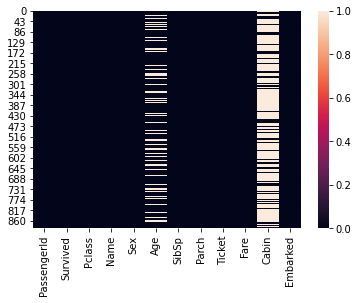

In [8]:
# Checking Null values using heatmap:-
sns.heatmap(train.isnull())

In [9]:
# No. of null values in the dataset:-
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# Drop null values :-
train.dropna(inplace = True)

In [11]:
# Summarizing the data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [12]:
# Dimension of the dataset after removal of null values:-
train.shape

(183, 12)

Now, the no. of Rows in Dataset is 183 and No. of Columns in Dataset is 12.

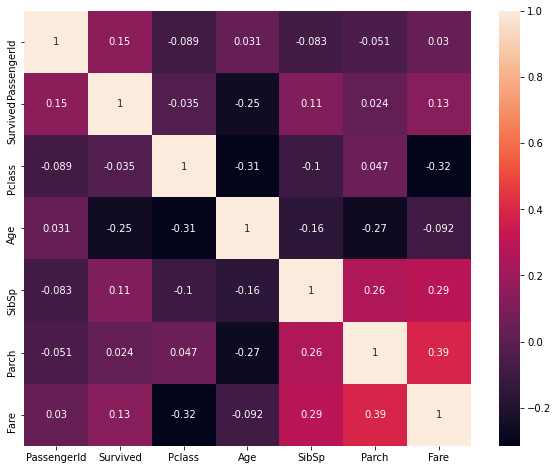

In [13]:
# Finding correlation:-
train_corr = train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(train_corr,annot = True);

In [14]:
# Total male and female present on the ship
p = train.Sex.value_counts()
p

male      95
female    88
Name: Sex, dtype: int64

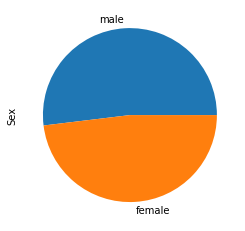

In [15]:
p.plot.pie();

In [16]:
# How many passengers survived and how many dies.
survive = train.Survived.value_counts()
survive

1    123
0     60
Name: Survived, dtype: int64

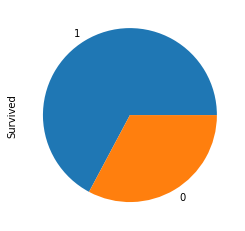

In [17]:
survive.plot.pie();

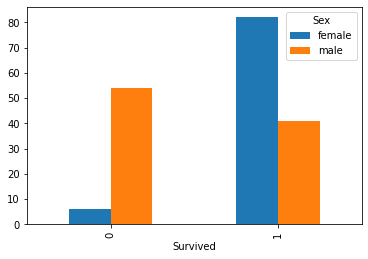

In [18]:
# Gender that survives the most
g_survive = pd.crosstab(index = train['Survived'],columns = train['Sex'])
g_survive.plot.bar();

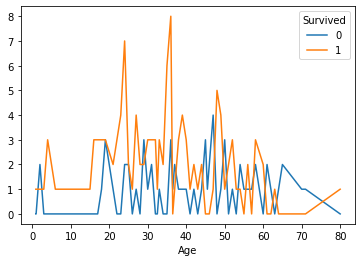

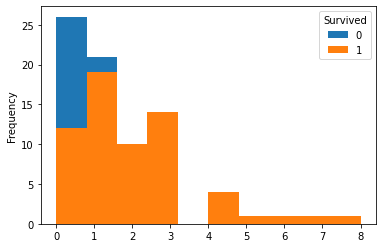

In [19]:
# AGE that survives the most
agesurvives = pd.crosstab(index = train['Age'],columns = train['Survived'])
agesurvives.plot.line();
agesurvives.plot.hist();

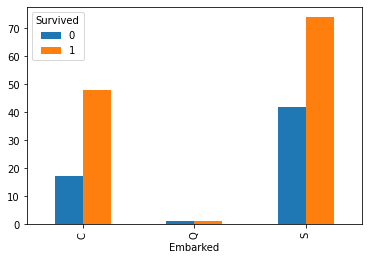

In [20]:
# Embarked that survives the most
embark = pd.crosstab(index = train['Embarked'],columns = train['Survived'])
embark.plot.bar();

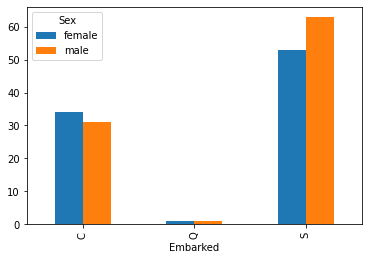

In [21]:
# Gender with embark that survives the most
embark_gen = pd.crosstab(index = train['Embarked'],columns = train['Sex'])
embark_gen.plot.bar();

In [22]:
train.replace(('male', 'female'), (1, 0), inplace=True)
test.replace(('male', 'female'), (1, 0), inplace=True)

In [23]:
# Getting Features
features = ['Sex','Pclass','SibSp','Parch','Embarked']
x = pd.get_dummies(train[features])

# Predicting value
y = train['Survived']

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 1/8, random_state = 52)

In [25]:
test_x = test[features]

In [26]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)

# Data Modelling:-

***1. Logistic Regression:-***

In [27]:
#import Library for Accuracy Score
from sklearn.metrics import accuracy_score

#import Library for Logistic Regression
from sklearn.linear_model import LogisticRegression

#Initialize the Logistic Regression Classifier
logisreg = LogisticRegression()

#Train the model using Training Dataset
logisreg.fit(x_train,y_train)

# Prediction using test data
y_pred = logisreg.predict(x_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_logisreg = accuracy_score(y_test, y_pred)
print( 'Accuracy of Logistic Regression model : ', acc_logisreg )

Accuracy of Logistic Regression model :  0.9130434782608695


***2. Linear DIscriminent Analysis:-***

In [28]:
#Import Library for Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score


#Initialize the Linear Discriminant Analysis Classifier
lda = LinearDiscriminantAnalysis()

#Train the model using Training Dataset
lda.fit(x_train,y_train)

# Prediction using test data
lda_pred = lda.predict(x_test)

# Calculate Model accuracy by comparing y_test and lda_pred
acc_lda = accuracy_score(y_test, lda_pred)
print( 'Accuracy of Linear Discriminant Analysis Classifier: ', acc_lda )

Accuracy of Linear Discriminant Analysis Classifier:  0.8695652173913043


***3. Gaussian Naive Bayes:-***

In [29]:
#Import Library for Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Initialize the Gaussian Naive Bayes Classifier
gnb = GaussianNB()

#Train the model using Training Dataset
gnb.fit(x_train,y_train)

# Prediction using test data
gnb_pred = gnb.predict(x_test)

# Calculate Model accuracy by comparing y_test and gnb_pred
acc_ganb = accuracy_score(y_test, gnb_pred)
print( 'Accuracy of Gaussian Naive Bayes : ', acc_ganb )

Accuracy of Gaussian Naive Bayes :  0.8260869565217391


***4. Decision Tree Classifier:-***


In [30]:
#Import Library for Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

#Initialize the Decision Tree Classifier
dtc = DecisionTreeClassifier()

#Train the model using Training Dataset
dtc.fit(x_train,y_train)

# Prediction using test data
dtc_pred = dtc.predict(x_test)

# Calculate Model accuracy by comparing y_test and dtc_pred
acc_dtree = accuracy_score(y_test, dtc_pred)
print( 'Accuracy of  Decision Tree Classifier : ', acc_dtree )

Accuracy of  Decision Tree Classifier :  0.7391304347826086


***5. Random Forest Classifier:-***

In [31]:
#Import Library for Random Forest
from sklearn.ensemble import RandomForestClassifier

#Initialize the Random Forest
rfc = RandomForestClassifier()

#Train the model using Training Dataset
rfc.fit(x_train,y_train)

# Prediction using test data
rfc_pred = rfc.predict(x_test)

# Calculate Model accuracy by comparing y_test and rfc_pred
acc_rf = accuracy_score(y_test, rfc_pred)
print( 'Accuracy of  Random Forest : ', acc_rf )

Accuracy of  Random Forest :  0.6956521739130435


***6. Support Vector Machine:-***

In [32]:
#Import Library for Support Vector Machine
from sklearn import svm

#Initialize the Support Vector Classifier
svmodel = svm.SVC()

#Train the model using Training Dataset
svmodel.fit(x_train,y_train)

# Prediction using test data
svm_pred = svmodel.predict(x_test)

# Calculate Model accuracy by comparing y_test and svm_pred
acc_svc = accuracy_score(y_test, svm_pred)
print( 'Accuracy of Support Vector Classifier: ', acc_svc )

Accuracy of Support Vector Classifier:  0.782608695652174


***7. KNN Classifier:-***

In [33]:
#Import Library for K Nearest Neighbour Model
from sklearn.neighbors import KNeighborsClassifier

#Initialize the K Nearest Neighbour Model with Default Value of K=5
knnmodel = KNeighborsClassifier()

#Train the model using Training Dataset
knnmodel.fit(x_train,y_train)

# Prediction using test data
knn_pred = knnmodel.predict(x_test)

# Calculate Model accuracy by comparing y_test and knn_pred
acc_knn = accuracy_score(y_test, knn_pred)
print( 'Accuracy of KNN Classifier: ', acc_knn )

Accuracy of KNN Classifier:  0.7391304347826086


# Model Selection:-

In [34]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Linear Discriminant Analysis','Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors'],
    'Score': [acc_logisreg, acc_lda, acc_ganb, acc_dtree, acc_rf, acc_svc, acc_knn]})

models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,0.913043
1,Linear Discriminant Analysis,0.869565
2,Naive Bayes,0.826087
5,Support Vector Machines,0.782609
3,Decision Tree,0.739130
6,K - Nearest Neighbors,0.739130
4,Random Forest,0.695652


> Now, as we can see from above Logistic Regression has highest accuracy i.e. 91.3%. So, we will predict our data using Logistic Regression Model.

In [35]:
#Import Library for Accuracy Score
from sklearn.metrics import accuracy_score

#Import Library for Logistic Regression
from sklearn.linear_model import LogisticRegression

#Initialize the Logistic Regression Classifier
logisreg = LogisticRegression()

#Train the model using Training Dataset
logisreg.fit(x_train,y_train)

# Prediction using test data
y_pred = logisreg.predict(pd.get_dummies(test_x))

In [36]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': y_pred.astype(int)})
output.to_csv('submission.csv', index=False)